In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
FOLDERNAME='Assignment4'
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


Mounted at /content/drive


In [2]:
!pip install wandb torch torchvision matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import wandb
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
import helpers.data_loader as data_loader
train_loader, val_loader, test_df=data_loader.get_complete_fer_setup()

დავიწყოთ layer-ების დამატება და სხვა პარამეტრები გვქონდეს მუდმივი რათა გავიგოთ რა გავლენა აქვს layer-ებს საბოლოო შედეგზე

In [5]:
wandb.login()
results={}
models={}

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: skara21 (skara21-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [6]:
import helpers.model_train as model_train
import helpers.model_analyser as model_analyser

In [7]:
class CNN2Layer(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN2Layer, self).__init__()

        self.conv1=nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2=nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.pool1=nn.MaxPool2d(2, 2)
        self.pool2=nn.MaxPool2d(2, 2)

        self.fc1=nn.Linear(64 * 12 * 12, 128)
        self.fc2=nn.Linear(128, num_classes)

    def forward(self, x):
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool2(F.relu(self.conv2(x)))

        x=x.view(-1, 64 * 12 * 12)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x


🔬 EXPERIMENT 1/4: 2-Layer CNN


Epoch  0: Train: 39.5%/1.549, Val: 44.7%/1.435, Gap: -0.114
Epoch  5: Train: 74.3%/0.711, Val: 55.2%/1.293, Gap: 0.582
Epoch 10: Train: 98.0%/0.088, Val: 55.2%/2.329, Gap: 2.241
Epoch 15: Train: 99.5%/0.035, Val: 54.7%/2.921, Gap: 2.886
Epoch 20: Train: 99.6%/0.019, Val: 55.7%/3.169, Gap: 3.149
Early stopping at epoch 22


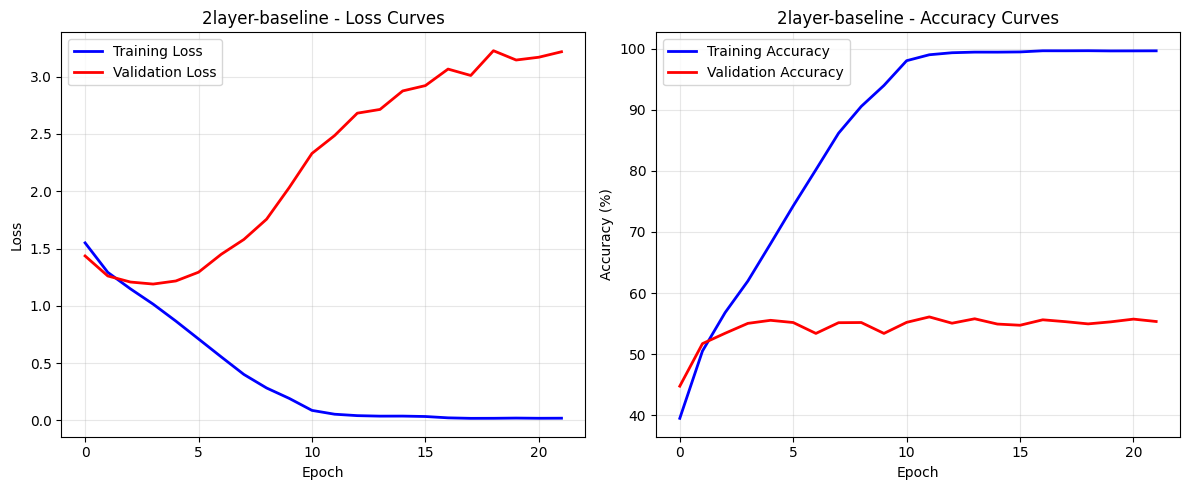

accuracy_gap,▁▂▂▃▃▄▅▆▇▇████████████
epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇▇██
final/best_val_accuracy,▁
final/final_acc_gap,▁
final/final_loss_gap,▁
final/final_train_accuracy,▁
final/final_val_accuracy,▁
final/overfitting_score,▁
final/total_epochs,▁
final/total_parameters,▁
learning_rate,██████████▃▃▃▃▃▃▁▁▁▁▁▁


In [8]:
print("\n🔬 EXPERIMENT 1/4: 2-Layer CNN")

model_2layer=CNN2Layer(num_classes=7)
results_2layer=model_train.train_model_depth(
    model=model_2layer,
    train_loader=train_loader,
    val_loader=val_loader,
    experiment_name="2layer-baseline",
    device=device,
    epochs=30
)
results['2layer']=results_2layer
models['2layer']=model_2layer

In [9]:
class CNN4Layer(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN4Layer, self).__init__()

        self.conv1=nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2=nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3=nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4=nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.pool1=nn.MaxPool2d(2, 2)
        self.pool2=nn.MaxPool2d(2, 2)

        self.fc1=nn.Linear(128 * 12 * 12, 256)
        self.fc2=nn.Linear(256, num_classes)

    def forward(self, x):
        x=F.relu(self.conv1(x))
        x=self.pool1(F.relu(self.conv2(x)))

        x=F.relu(self.conv3(x))
        x=self.pool2(F.relu(self.conv4(x)))

        x=x.view(-1, 128 * 12 * 12)
        x=F.relu(self.fc1(x))

        x=self.fc2(x)
        return x


🔬 EXPERIMENT 2/4: 4-Layer CNN


Epoch  0: Train: 38.8%/1.558, Val: 47.2%/1.355, Gap: -0.203
Epoch  5: Train: 86.8%/0.371, Val: 56.5%/1.719, Gap: 1.349
Epoch 10: Train: 99.1%/0.035, Val: 57.3%/3.263, Gap: 3.228
Epoch 15: Train: 99.6%/0.020, Val: 57.3%/3.175, Gap: 3.155
Epoch 20: Train: 99.7%/0.011, Val: 57.4%/3.074, Gap: 3.063
Early stopping at epoch 25


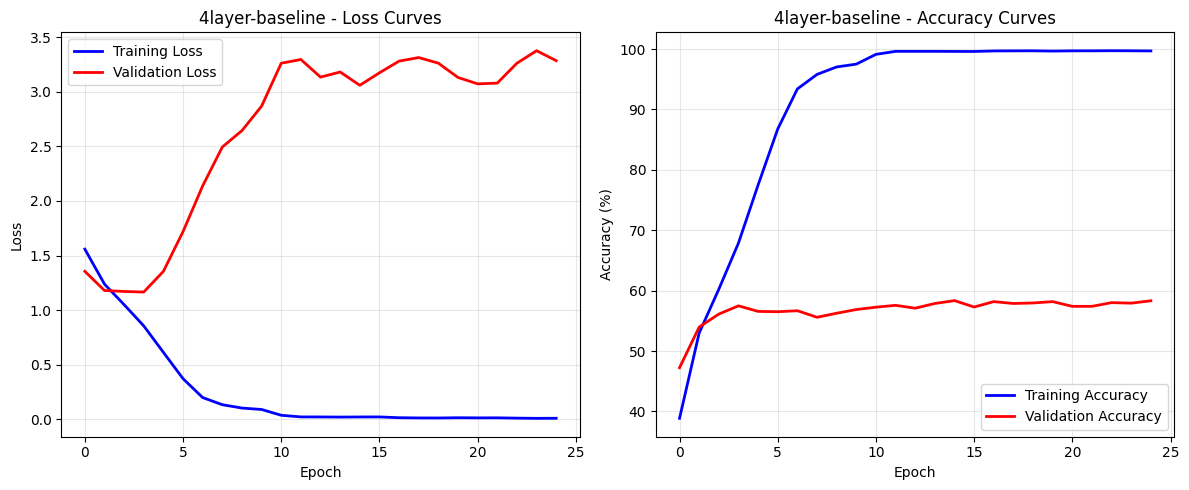

accuracy_gap,▁▂▃▄▅▆▇██████████████████
epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
final/best_val_accuracy,▁
final/final_acc_gap,▁
final/final_loss_gap,▁
final/final_train_accuracy,▁
final/final_val_accuracy,▁
final/overfitting_score,▁
final/total_epochs,▁
final/total_parameters,▁
learning_rate,██████████▄▄▄▄▄▄▂▂▂▂▂▂▁▁▁


In [10]:
print("\n🔬 EXPERIMENT 2/4: 4-Layer CNN")

model_4layer=CNN4Layer(num_classes=7)
results_4layer=model_train.train_model_depth(
    model=model_4layer,
    train_loader=train_loader,
    val_loader=val_loader,
    experiment_name="4layer-baseline",
    device=device,
    epochs=30
)
results['4layer']=results_4layer
models['4layer']=model_4layer

In [11]:
class CNN6Layer(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN6Layer, self).__init__()

        self.conv1=nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2=nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv3=nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4=nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv5=nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6=nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.pool2=nn.MaxPool2d(2, 2)
        self.pool1=nn.MaxPool2d(2, 2)
        self.pool3=nn.MaxPool2d(2, 2)

        self.fc1=nn.Linear(128 * 6 * 6, 512)
        self.fc2=nn.Linear(512, num_classes)

    def forward(self, x):
        x=F.relu(self.conv1(x))
        x=self.pool1(F.relu(self.conv2(x)))

        x=F.relu(self.conv3(x))
        x=self.pool2(F.relu(self.conv4(x)))

        x=F.relu(self.conv5(x))
        x=self.pool3(F.relu(self.conv6(x)))

        x=x.view(-1, 128 * 6 * 6)
        x=F.relu(self.fc1(x))

        x=self.fc2(x)
        return x


🔬 EXPERIMENT 3/4: 6-Layer CNN


Epoch  0: Train: 30.6%/1.713, Val: 40.7%/1.514, Gap: -0.199
Epoch  5: Train: 69.9%/0.799, Val: 58.0%/1.177, Gap: 0.378
Epoch 10: Train: 93.7%/0.179, Val: 56.6%/2.346, Gap: 2.167
Epoch 15: Train: 99.1%/0.037, Val: 58.5%/3.603, Gap: 3.566
Epoch 20: Train: 99.7%/0.014, Val: 59.2%/3.652, Gap: 3.638
Epoch 25: Train: 99.7%/0.008, Val: 59.8%/3.685, Gap: 3.676
Epoch 29: Train: 99.7%/0.007, Val: 59.5%/3.699, Gap: 3.692


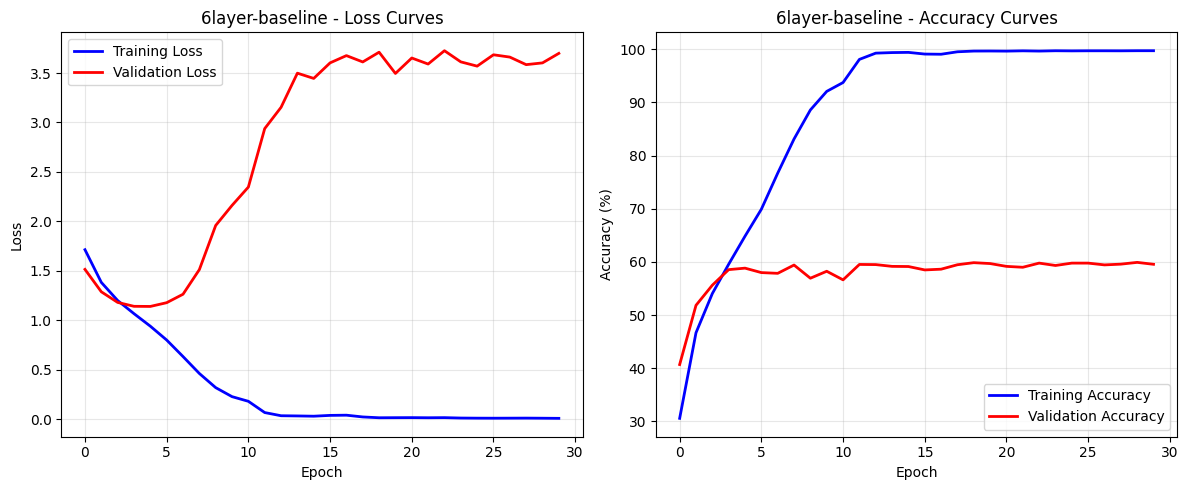

accuracy_gap,▁▂▂▃▃▄▅▆▇▇████████████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
final/best_val_accuracy,▁
final/final_acc_gap,▁
final/final_loss_gap,▁
final/final_train_accuracy,▁
final/final_val_accuracy,▁
final/overfitting_score,▁
final/total_epochs,▁
final/total_parameters,▁
learning_rate,███████████▄▄▄▄▄▄▂▂▂▂▂▂▁▁▁▁▁▁▁


In [12]:
print("\n🔬 EXPERIMENT 3/4: 6-Layer CNN")

model_6layer=CNN6Layer(num_classes=7)
results_6layer=model_train.train_model_depth(
    model=model_6layer,
    train_loader=train_loader,
    val_loader=val_loader,
    experiment_name="6layer-baseline",
    device=device,
    epochs=30
)
results['6layer']=results_6layer
models['6layer']=model_6layer

In [13]:
class CNN8Layer(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN8Layer, self).__init__()

        self.conv1=nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2=nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv3=nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4=nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv5=nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6=nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv7=nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv8=nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.pool1=nn.MaxPool2d(2, 2)
        self.pool2=nn.MaxPool2d(2, 2)
        self.pool3=nn.MaxPool2d(2, 2)
        self.pool4=nn.MaxPool2d(2, 2)



        self.fc1=nn.Linear(256 * 3 * 3, 1024)
        self.fc2=nn.Linear(1024, 512)
        self.fc3=nn.Linear(512, num_classes)


    def forward(self, x):
        x=F.relu(self.conv1(x))
        x=self.pool1(F.relu(self.conv2(x)))

        x=F.relu(self.conv3(x))
        x=self.pool2(F.relu(self.conv4(x)))

        x=F.relu(self.conv5(x))
        x=self.pool3(F.relu(self.conv6(x)))

        x=F.relu(self.conv7(x))
        x=self.pool4(F.relu(self.conv8(x)))

        x=x.view(-1, 256 * 3 * 3)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))

        x=self.fc3(x)
        return x


🔬 EXPERIMENT 4/4: 8-Layer CNN


Epoch  0: Train: 24.8%/1.812, Val: 25.0%/1.790, Gap: -0.022
Epoch  5: Train: 55.7%/1.156, Val: 52.4%/1.219, Gap: 0.063
Epoch 10: Train: 74.0%/0.690, Val: 56.6%/1.298, Gap: 0.608
Epoch 15: Train: 95.5%/0.130, Val: 56.7%/2.769, Gap: 2.639
Epoch 20: Train: 99.1%/0.030, Val: 57.6%/3.843, Gap: 3.813
Epoch 25: Train: 99.2%/0.026, Val: 56.3%/4.326, Gap: 4.300
Epoch 29: Train: 99.8%/0.006, Val: 56.8%/4.878, Gap: 4.871


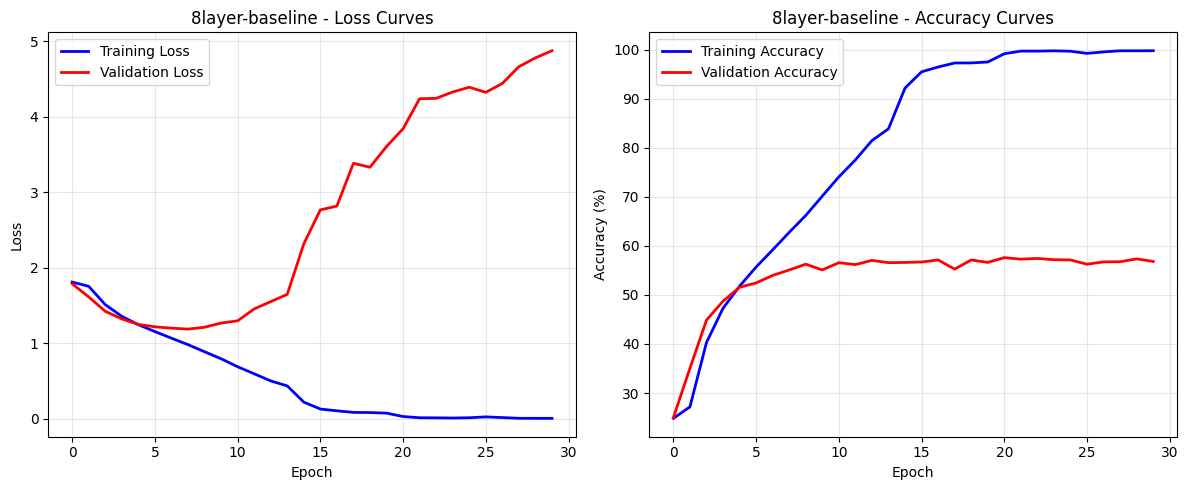

accuracy_gap,▂▁▁▂▂▃▃▃▃▄▄▅▅▆▇▇▇█████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
final/best_val_accuracy,▁
final/final_acc_gap,▁
final/final_loss_gap,▁
final/final_train_accuracy,▁
final/final_val_accuracy,▁
final/overfitting_score,▁
final/total_epochs,▁
final/total_parameters,▁
learning_rate,██████████████▄▄▄▄▄▄▂▂▂▂▂▂▁▁▁▁


In [14]:
print("\n🔬 EXPERIMENT 4/4: 8-Layer CNN")

model_8layer=CNN8Layer(num_classes=7)
results_8layer=model_train.train_model_depth(
    model=model_8layer,
    train_loader=train_loader,
    val_loader=val_loader,
    experiment_name="8layer-baseline",
    device=device,
    epochs=30
)
results['8layer']=results_8layer
models['8layer']=model_8layer

ვნახოთ მიღებული შედეგები

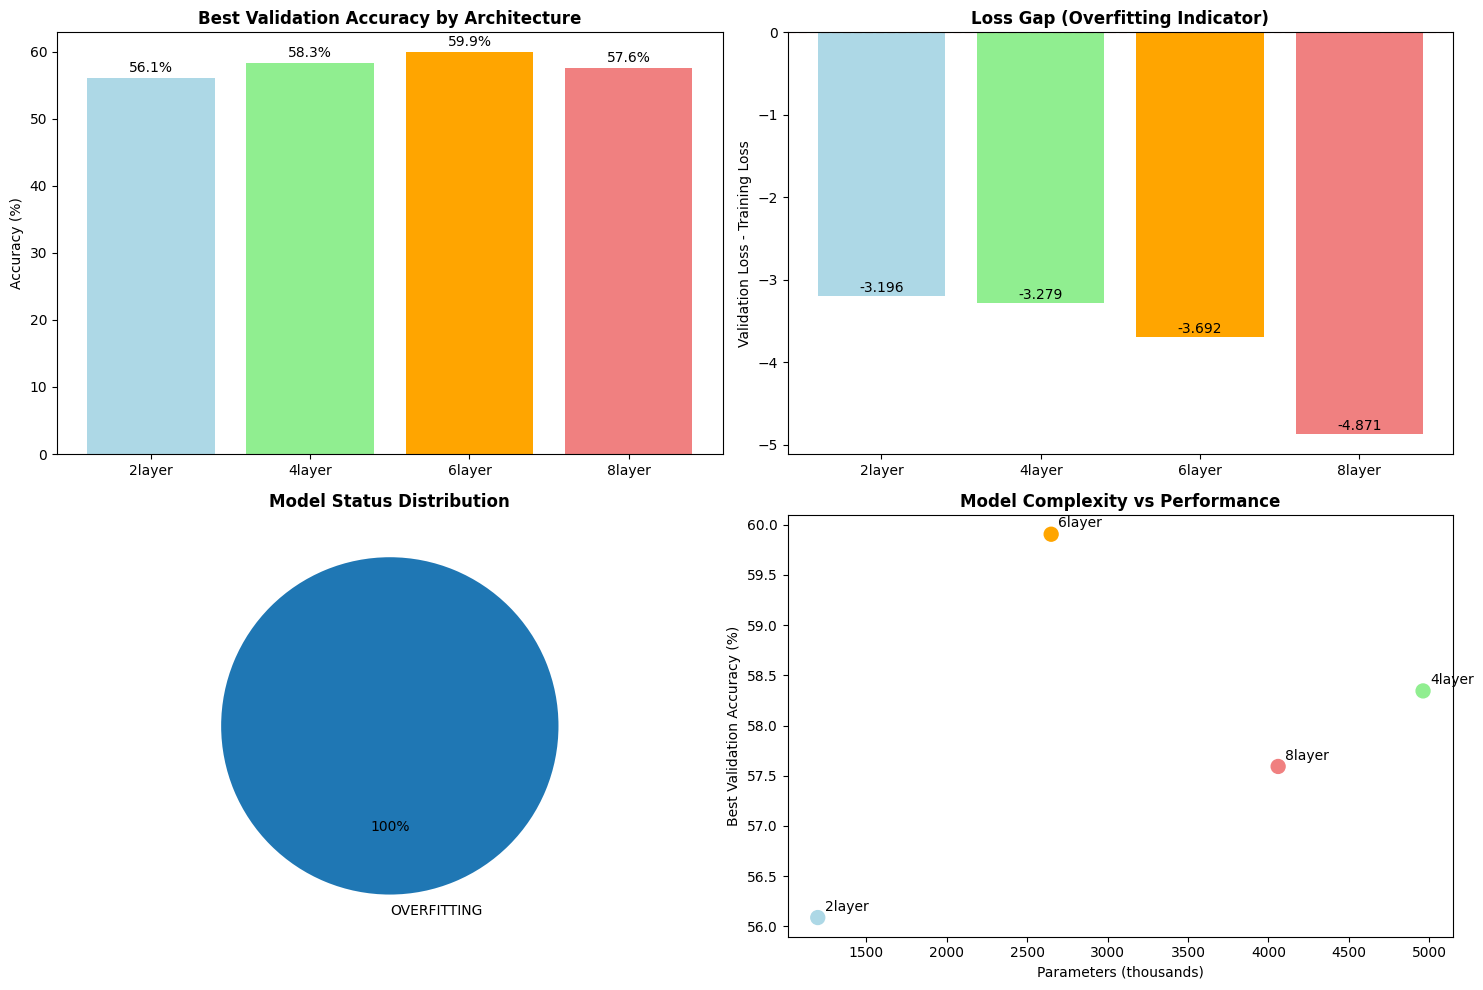

In [15]:
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2, 2, figsize=(15, 10))

architectures=list(results.keys())

#validation accuracy
val_accs=[results[arch]['best_val_accuracy'] for arch in architectures]
bars1=ax1.bar(architectures, val_accs, color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
ax1.set_title('Best Validation Accuracy by Architecture', fontweight='bold')
ax1.set_ylabel('Accuracy (%)')
for bar, acc in zip(bars1, val_accs):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{acc:.1f}%', ha='center', va='bottom')

#overfitting analysis
loss_gaps=[results[arch]['final_loss_gap'] for arch in architectures]
bars2=ax2.bar(architectures, loss_gaps, color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
ax2.set_title('Loss Gap (Overfitting Indicator)', fontweight='bold')
ax2.set_ylabel('Validation Loss - Training Loss')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
for bar, gap in zip(bars2, loss_gaps):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{gap:.3f}', ha='center', va='bottom')

#model status distribution
statuses=[results[arch]['model_status'] for arch in architectures]
status_counts=pd.Series(statuses).value_counts()
ax3.pie(status_counts.values, labels=status_counts.index, autopct='%1.0f%%', startangle=90)
ax3.set_title('Model Status Distribution', fontweight='bold')

#parameter count vs performance
params=[results[arch]['total_parameters']/1000 for arch in architectures]
ax4.scatter(params, val_accs, s=100, c=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
ax4.set_xlabel('Parameters (thousands)')
ax4.set_ylabel('Best Validation Accuracy (%)')
ax4.set_title('Model Complexity vs Performance', fontweight='bold')
for i, arch in enumerate(architectures):
    ax4.annotate(arch, (params[i], val_accs[i]), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [18]:
# Key Insights
print(f"Key insights:")

best_arch=max(results.keys(), key=lambda x: results[x]['best_val_accuracy'])
most_overfitted=max(results.keys(), key=lambda x: results[x]['final_loss_gap'])

print(f"Best performing: {best_arch} ({results[best_arch]['best_val_accuracy']:.2f}%)")
print(f"Most overfitted: {most_overfitted} (gap: {results[most_overfitted]['final_loss_gap']:.3f})")

print(f"Reccomendation:")
print(f"Use {best_arch} architecture as baseline for skip connections study")

Key insights:
Best performing: 6layer (59.91%)
Most overfitted: 2layer (gap: -3.196)
Reccomendation:
Use 6layer architecture as baseline for skip connections study


In [17]:
model=models[best_arch]
save_path='/content/drive/MyDrive/Assignment4/models/first_best_model.pth'

torch.save(model, save_path)

print(f"Model saved to: {save_path}")

Model saved to: /content/drive/MyDrive/Assignment4/models/first_best_model.pth


ექსპერიმენტებმა გვაჩვენა რომ 6 layer-იანი მოდელი საუკეთესო შედეგს გვაძლევს.
ეს ცოტა მოულოდნელია, მე მოველოდი რომ 4 layer-იანი მოდელი იქნებოდა ამ მონაცემებისთვის უკეთესი.
გადავიდეთ შემდეგ ეტაპზე, skip connections ტესტებზე, სადაც უკვე **6 layer-იან ნეირონულ ქსელს გამოვიყენებთ**.